# Intro to matplotlib

## Intro

### fig, ax, & plt.subplots()

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

* 先來介紹 oo 的寫法
* 一率先用 `fig, ax = plt.subplots()` 當開頭
  * fig 是 container which hold everything you see on the page
  * ax 是 part of the page that holds data, it is the canvas
* 所以，在我們還沒有 assign data 給 ax 前，畫出來的圖，就是白的：

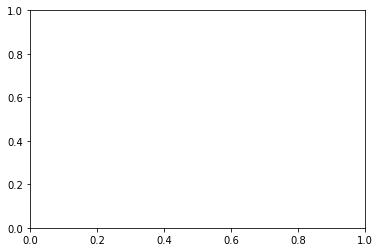

In [29]:
fig, ax = plt.subplots() # subplots 裡面沒寫參數，預設就是 1 ，表示你只要畫 1 張 subplot
plt.show()

* 接著，我們把 data 加進 ax 裡面

In [22]:
seattle_weather = pd.read_csv("data/seattle_weather.csv")
sub_data = seattle_weather.loc[seattle_weather.STATION == "USC00456295"]
sub_data.loc[:, ["DATE","MLY-PRCP-NORMAL"]] # prcp = precipitation (inches) 的縮寫，雨量

,DATE,MLY-PRCP-NORMAL
0,1,11.03
1,2,7.74
2,3,9.08
3,4,7.37
4,5,6.39
5,6,5.34
6,7,2.55
7,8,2.56
8,9,3.95
9,10,7.29



* adding data to axes

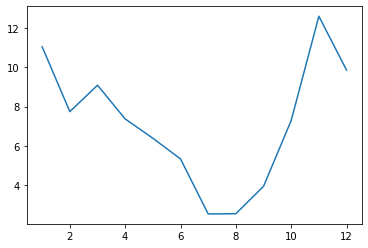

In [21]:
fig, ax = plt.subplots()
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-NORMAL"])

* 那如果我想在這張圖上，再加上其他的 line ，我該怎麼做呢？
* 答案是：一直 `ax.plot()` 下去就好
* 例如剛剛這條線，我在資料中，還有 PR25, PR75 的資料，所以我可以畫出這個區間: 

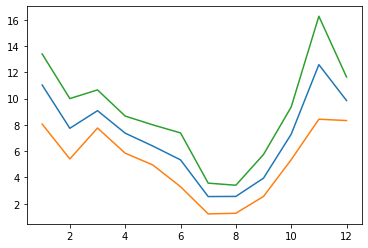

In [23]:
fig, ax = plt.subplots()
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-NORMAL"])
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-25PCTL"])
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-75PCTL"])

* 不錯，有上下限了，但不太美觀，下一節開始 customize 一些細節

### customize

* 但因為這張圖，資料點其實只出現在 "月份" 上，所以最好加上 marker ，讓讀者知道資料出現在哪

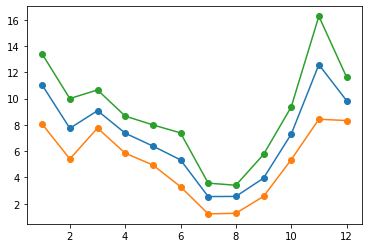

In [24]:
fig, ax = plt.subplots()
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-NORMAL"], marker = "o")
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-25PCTL"], marker = "o")
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-75PCTL"], marker = "o")

* 我們也可以改變線條的 linestyle:

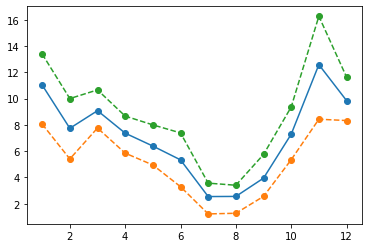

In [25]:
fig, ax = plt.subplots()
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-NORMAL"], marker = "o")
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-25PCTL"], marker = "o", linestyle = "--")
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-75PCTL"], marker = "o", linestyle = "--")

* 也可以改顏色

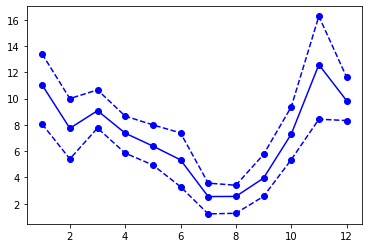

In [26]:
fig, ax = plt.subplots()
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-NORMAL"], marker = "o", color = "blue")
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-25PCTL"], marker = "o", color = "blue", linestyle = "--")
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-75PCTL"], marker = "o", color = "blue", linestyle = "--")

* 改 x label, y label, title

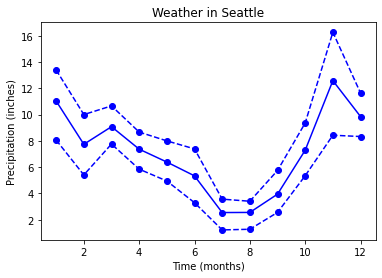

In [28]:
fig, ax = plt.subplots()
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-NORMAL"], marker = "o", color = "blue")
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-25PCTL"], marker = "o", color = "blue", linestyle = "--")
ax.plot(sub_data["DATE"], sub_data["MLY-PRCP-75PCTL"], marker = "o", color = "blue", linestyle = "--")
ax.set_xlabel("Time (months)");
ax.set_ylabel("Precipitation (inches)")
ax.set_title("Weather in Seattle");

### small multiples

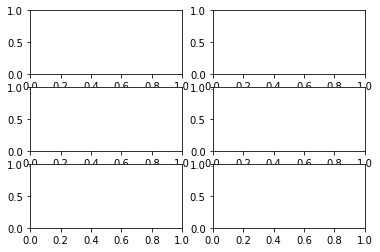

In [30]:
fig, ax = plt.subplots(3, 2)
plt.show()

* 此時，ax 變成 array object，可以確認看看：

In [32]:
ax.shape

(3, 2)

* 所以，我等等要畫圖時，我要指名我要對 ax 這個 array 中的哪個 ax 畫圖
* 例如，我要對 (0,0) 畫圖，那就要寫 `ax[0,0].plot()`

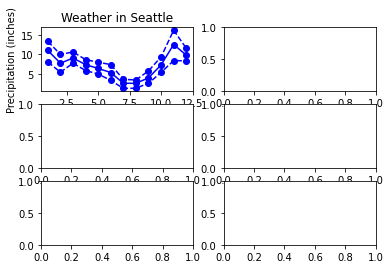

In [33]:
fig, ax = plt.subplots(3,2)
ax[0,0].plot(sub_data["DATE"], sub_data["MLY-PRCP-NORMAL"], marker = "o", color = "blue")
ax[0,0].plot(sub_data["DATE"], sub_data["MLY-PRCP-25PCTL"], marker = "o", color = "blue", linestyle = "--")
ax[0,0].plot(sub_data["DATE"], sub_data["MLY-PRCP-75PCTL"], marker = "o", color = "blue", linestyle = "--")
ax[0,0].set_xlabel("Time (months)");
ax[0,0].set_ylabel("Precipitation (inches)")
ax[0,0].set_title("Weather in Seattle");

* 要注意的是，如果你的 subplot 只有一行或一列，那 ax 會退化到 1d array (而不是剛剛的 2d array)

In [ ]:
fig, ax = plt.subplots(2,1) # 畫出 2 列 1 行
ax.shape

(2,)

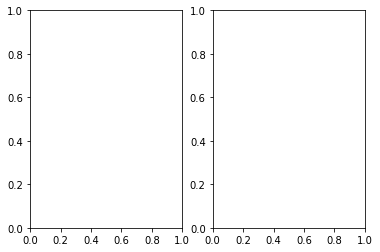

In [34]:
fig, ax = plt.subplots(1,2) # 畫出 1 列 2 行
ax.shape

* 所以在畫圖時，就要用 `ax[0].plot`, `ax[1].plot` 來指定畫圖
* 舉例來說，我取兩個城市的資料來畫圖：

In [41]:
seattle_weather = pd.read_csv("data/seattle_weather.csv")
austin_weather = pd.read_csv("data/austin_weather.csv")

seattle_sub = seattle_weather.loc[seattle_weather.STATION == "USC00456295"]
austin_sub = austin_weather.loc[austin_weather.STATION == "USW00013904"]

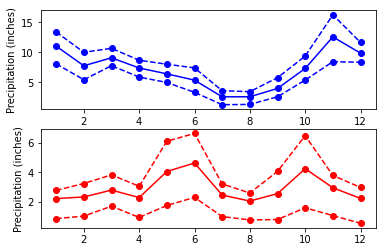

In [46]:
fig, ax = plt.subplots(2,1) # 畫出 2 列 1 行

ax[0].plot(seattle_sub["DATE"], seattle_sub["MLY-PRCP-NORMAL"], marker = "o", color = "blue")
ax[0].plot(seattle_sub["DATE"], seattle_sub["MLY-PRCP-25PCTL"], marker = "o", color = "blue", linestyle = "--")
ax[0].plot(seattle_sub["DATE"], seattle_sub["MLY-PRCP-75PCTL"], marker = "o", color = "blue", linestyle = "--")

ax[1].plot(austin_sub["DATE"], austin_sub["MLY-PRCP-NORMAL"], marker = "o", color = "red")
ax[1].plot(austin_sub["DATE"], austin_sub["MLY-PRCP-25PCTL"], marker = "o", color = "red", linestyle = "--")
ax[1].plot(austin_sub["DATE"], austin_sub["MLY-PRCP-75PCTL"], marker = "o", color = "red", linestyle = "--")

ax[0].set_ylabel("Precipitation (inches)");
ax[1].set_ylabel("Precipitation (inches)");

* 雖然累了點，很多 重複性高 的 code，但結果跟預期差不多
* 但我們有發現， y 軸的 scale 不同，所以，我可以用 `plt.subplots(2, 1, sharey = True)`，來強制 y 軸做 share (相同 scale)

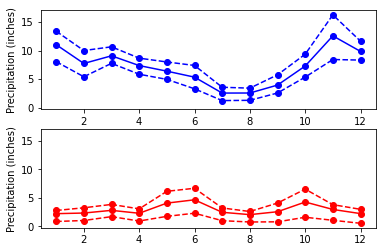

In [47]:
fig, ax = plt.subplots(2,1, sharey = True) # 畫出 2 列 1 行

ax[0].plot(seattle_sub["DATE"], seattle_sub["MLY-PRCP-NORMAL"], marker = "o", color = "blue")
ax[0].plot(seattle_sub["DATE"], seattle_sub["MLY-PRCP-25PCTL"], marker = "o", color = "blue", linestyle = "--")
ax[0].plot(seattle_sub["DATE"], seattle_sub["MLY-PRCP-75PCTL"], marker = "o", color = "blue", linestyle = "--")

ax[1].plot(austin_sub["DATE"], austin_sub["MLY-PRCP-NORMAL"], marker = "o", color = "red")
ax[1].plot(austin_sub["DATE"], austin_sub["MLY-PRCP-25PCTL"], marker = "o", color = "red", linestyle = "--")
ax[1].plot(austin_sub["DATE"], austin_sub["MLY-PRCP-75PCTL"], marker = "o", color = "red", linestyle = "--")

ax[0].set_ylabel("Precipitation (inches)");
ax[1].set_ylabel("Precipitation (inches)");

## Time- series data

In [51]:
climate_change = pd.read_csv(
    "data/climate_change.csv", 
    parse_dates=["date"], 
    index_col = "date"
)
climate_change

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06
...,...,...
2016-08-06,402.27,0.98
2016-09-06,401.05,0.87
2016-10-06,401.59,0.89


Text(0, 0.5, 'Relative temperature (Celsius)')

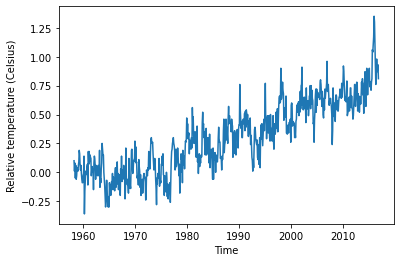

In [ ]:
fig, ax = plt.subplots()

ax.plot(climate_change.index, climate_change.relative_temp)
ax.set_xlabel("Time")
ax.set_ylabel("Relative temperature (Celsius)")


* 把時間軸 zoom in 一下 (因為時間現在是 index，所以可以很方便的做 subset)

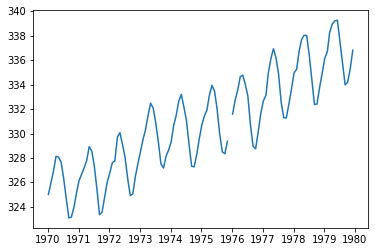

In [54]:
fig, ax = plt.subplots()
seventies = climate_change["1970-01-01":"1979-12-31"]
ax.plot(seventies.index, seventies["co2"])

### 雙軸圖

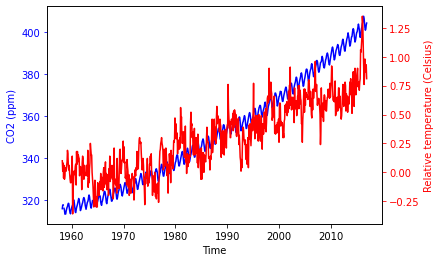

In [58]:
fig, ax = plt.subplots()
ax.plot(climate_change.index, climate_change["co2"], color = "blue")
ax.set_xlabel("Time")
ax.set_ylabel("CO2 (ppm)", color = "blue")
ax.tick_params("y", colors = "blue")

ax2 = ax.twinx()
ax2.plot(climate_change.index, climate_change["relative_temp"], color = "red")
ax2.set_ylabel("Relative temperature (Celsius)", color = "red")
ax2.tick_params("y", colors = "red")


* 來寫個 function，讓我們可以做得更快一點

In [67]:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color = color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color = color)
    axes.tick_params("y", colors = color)

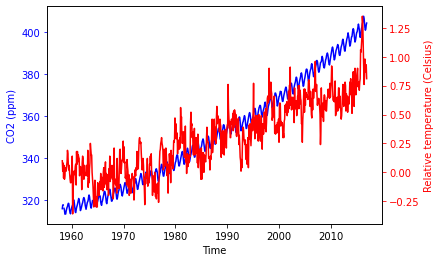

In [68]:
fig, ax = plt.subplots()
plot_timeseries(
    axes = ax, 
    x = climate_change.index, 
    y = climate_change["co2"], 
    color = "blue",
    xlabel = "Time",
    ylabel = "CO2 (ppm)"
)

ax2 = ax.twinx()
plot_timeseries(
    axes = ax2, 
    x = climate_change.index, 
    y = climate_change["relative_temp"], 
    color = "red",
    xlabel = "Time",
    ylabel = "Relative temperature (Celsius)"
)

### 加上 annotation

Text(2008-10-06 00:00:00, -0.2, '>1 degree')

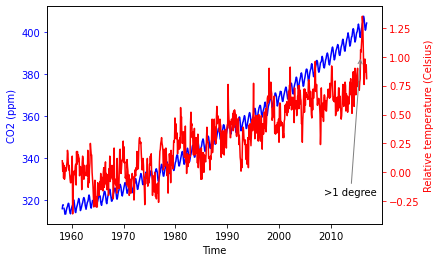

In [69]:
fig, ax = plt.subplots()
plot_timeseries(
    axes = ax, 
    x = climate_change.index, 
    y = climate_change["co2"], 
    color = "blue",
    xlabel = "Time",
    ylabel = "CO2 (ppm)"
)

ax2 = ax.twinx()
plot_timeseries(
    axes = ax2, 
    x = climate_change.index, 
    y = climate_change["relative_temp"], 
    color = "red",
    xlabel = "Time",
    ylabel = "Relative temperature (Celsius)"
)
ax2.annotate(">1 degree", # annotation 的文字
             xy=(pd.Timestamp("2015-10-06"), 1), # annotation 的點所在的座標
             xytext = (pd.Timestamp('2008-10-06'), -0.2), # 要顯示的文字所在的座標
             arrowprops={"arrowstyle": "->", # 箭頭，從文字指向要標記的點
                         "color": "gray"})

## Statistical plots

In [71]:
medals = pd.read_csv("data/medals_by_country_2016.csv", index_col = 0)
medals

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4
Japan,34,17,13


### Bar chart

#### Simple bar chart

* 我們想畫出，各國的金牌數量

<BarContainer object of 10 artists>

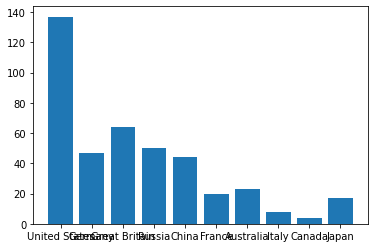

In [72]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])

* xlabel 都重疊再一起，我們把它轉 90 度

/var/folders/j9/71c8r2vs343cb9329xbww0240000gn/T/ipykernel_71988/528635632.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 90);


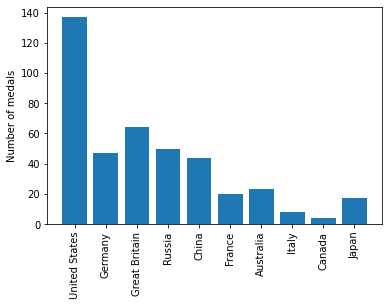

In [76]:
fig, ax = plt.subplots();
ax.bar(medals.index, medals["Gold"]);
ax.set_xticklabels(medals.index, rotation = 90);
ax.set_ylabel("Number of medals");

#### stack bar chart

* 我們可以做 stack bar chart

/var/folders/j9/71c8r2vs343cb9329xbww0240000gn/T/ipykernel_71988/3216558047.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation = 90);


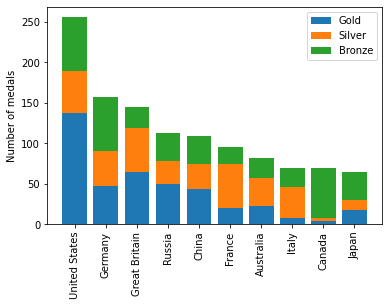

In [79]:
fig, ax = plt.subplots();
ax.bar(medals.index, medals["Gold"], label = "Gold");
ax.bar(medals.index, medals["Silver"], bottom = medals["Gold"], label = "Silver")
ax.bar(medals.index, medals["Bronze"],
       bottom = medals["Gold"]+medals["Silver"], 
       label = "Bronze")

ax.set_xticklabels(medals.index, rotation = 90);
ax.set_ylabel("Number of medals");
ax.legend()

### Histogram

In [86]:
tt = pd.read_csv("data/summer2016.csv", index_col = 0)
mens_rowing = tt.query("(Sex == 'M') & (Sport == 'Rowing')")
mens_gymnastic = tt.query("(Sex == 'M') & (Sport == 'Gymnastics')")

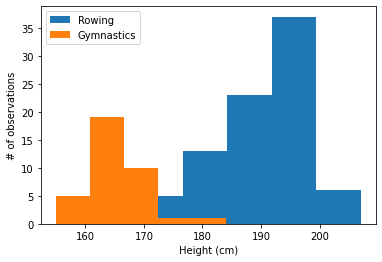

In [87]:
fig, ax = plt.subplots()
ax.hist(mens_rowing["Height"], label = "Rowing", bins = 5)
ax.hist(mens_gymnastic["Height"], label = "Gymnastics", bins = 5)
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()

### Error bars

* 幫 bar chart 加上 error bar

<BarContainer object of 1 artists>

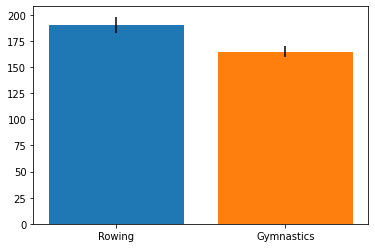

In [90]:
fig, ax = plt.subplots()

ax.bar("Rowing", 
       mens_rowing["Height"].mean(),
       yerr = mens_rowing["Height"].std())
ax.bar(
    "Gymnastics",
    mens_gymnastic["Height"].mean(),
    yerr = mens_gymnastic["Height"].std()
)

* 我們也可以用迴圈，畫完所有運動員的 bar chart with error bar

/var/folders/j9/71c8r2vs343cb9329xbww0240000gn/T/ipykernel_71988/1536233426.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sports, rotation = 90)


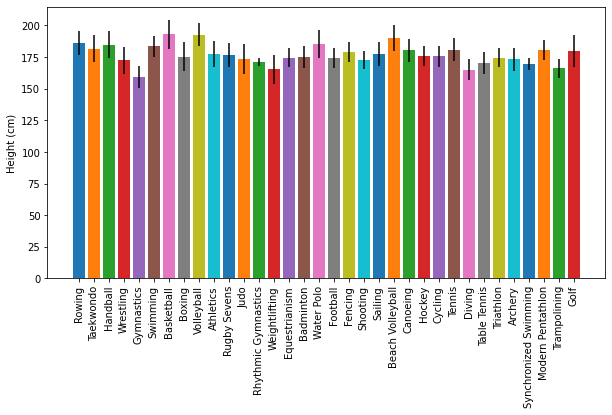

In [109]:
tt = pd.read_csv("data/summer2016.csv", index_col = 0)
sports = tt.Sport.unique()

fig, ax = plt.subplots()
fig.set_size_inches([10, 5])
for sport in sports:
    sport_df = tt.loc[tt.Sport == sport]
    ax.bar(sport, sport_df["Height"].mean(), yerr = sport_df["Height"].std())

ax.set_ylabel("Height (cm)")
ax.set_xticklabels(sports, rotation = 90)
plt.show()

* 幫 line chart 加上 error bar

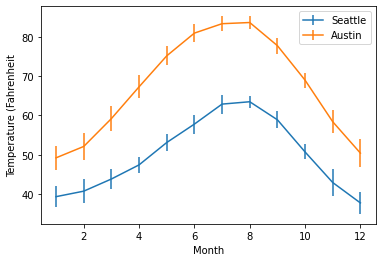

In [96]:
fig, ax = plt.subplots()

ax.errorbar(
    seattle_sub["DATE"],
    seattle_sub["MLY-TAVG-NORMAL"],
    yerr = seattle_sub["MLY-TAVG-STDDEV"],
    label = "Seattle"
)

ax.errorbar(
    austin_sub["DATE"],
    austin_sub["MLY-TAVG-NORMAL"],
    yerr = austin_sub["MLY-TAVG-STDDEV"],
    label = "Austin"
)

ax.set_ylabel("Temperature (Fahrenheit")
ax.set_xlabel("Month")
ax.legend()

### Boxplot

Text(0, 0.5, 'Height (cm)')

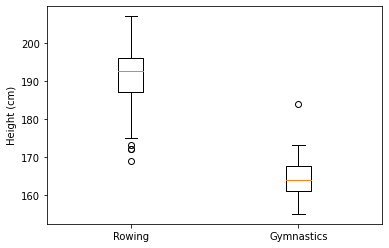

In [97]:
fig, ax = plt.subplots()
ax.boxplot([mens_rowing["Height"], mens_gymnastic["Height"]])
ax.set_xticklabels(["Rowing", "Gymnastics"])
ax.set_ylabel("Height (cm)")

### scatter plot

Text(0, 0.5, 'Relative temperature (Celsius)')

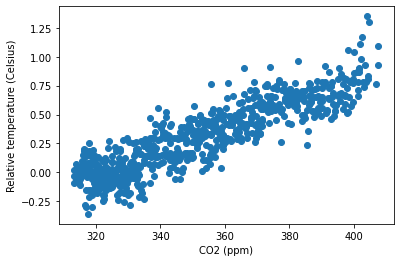

In [100]:
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"])
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

Text(0, 0.5, 'Relative temperature (Celsius)')

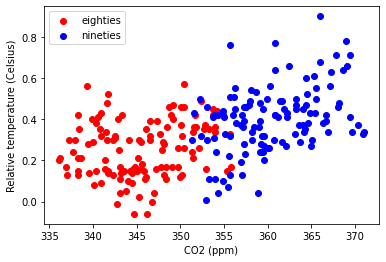

In [101]:
eighties = climate_change["1980-01-01":"1989-12-31"]
nineties = climate_change["1990-01-01":"1999-12-31"]

fig, ax = plt.subplots()
ax.scatter(eighties["co2"], eighties["relative_temp"],
           color = "red", label = "eighties")
ax.scatter(nineties["co2"], nineties["relative_temp"],
           color = "blue", label = "nineties")
ax.legend()

ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

Text(0, 0.5, 'Relative temperature (Celsius)')

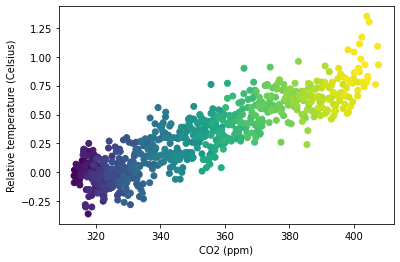

In [102]:
fig, ax = plt.subplots()
ax.scatter(climate_change["co2"], climate_change["relative_temp"],
           c = climate_change.index)
ax.set_xlabel("CO2 (ppm)")
ax.set_ylabel("Relative temperature (Celsius)")

## Saving files

In [ ]:
fig, ax = plt.subplots()

# fig.savefig("gold_medals.png")
# fig.savefig("gold_medals.jpg")
# fig.savefig("gold_medals.svg")

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches([5, 3]) # width, height